### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn import datasets, metrics
digits = datasets.load_digits()
print(digits.data.shape)
X = digits.data
y = digits.target
print(np.bincount(y))

(1797, 64)
[178 182 177 183 181 182 181 179 174 180]


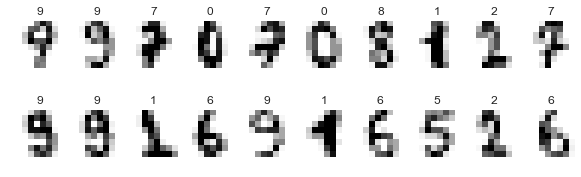

In [3]:
fig, axes = plt.subplots(2, 10, figsize=(10, 3))
for ax in axes.ravel():
    i = np.random.randint(0, digits.data.shape[0], 1)[0]
    ax.imshow(X[i].reshape(8, 8))
    ax.axis('off')
    ax.set_title(y[i])

In [4]:
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')

    if target_names is not None:
        plt.xticks(np.arange(len(target_names)), target_names)
        plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()
    plt.savefig('fig.png', dpi=220, transparent=False, bbox_inches='tight')

Accuracy of test set = 0.960


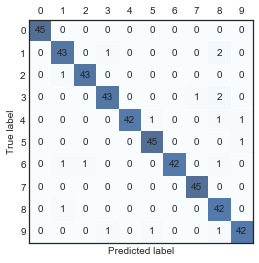

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy of test set = {accuracy_score(y_test, y_pred):.3f}")
plot_confusion_matrix(conf_mat, digits.target_names)